In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import logging, os
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)
# logging.basicConfig(level=logging.DEBUG)

BASE_PATH = "../../../../local_data/practice/"
DATA_PATH = "../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"pr_class_09_2_keras_xfer_cv/"
os.system("mkdir -p " + OUTPUT_PATH)

(train_ds, validation_ds), metadata= tfds.load(
    "cats_vs_dogs",
    data_dir=DATA_PATH,
    split=["train[:40%]", "train[40%:50%]"],
    with_info=True,
    as_supervised=True, 
)# Include labels

2025-07-01 21:24:18.564100: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 21:24:18.683036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:absl:Load dataset info from ../../../../local_data/tfds/cats_vs_dogs/4.0.0
INFO:absl:Reusing dataset cats_vs_dogs (../../../../local_data/tfds/cats_vs_dogs/4.0.0)
INFO:absl:Constructing tf.data.Dataset cats_vs_dogs for split ['train[:40%]', 'train[40%:50%]'], from ../../../../local_data/tfds/cats_vs_dogs/4.0.0


In [2]:
num_train = tf.data.experimental.cardinality(train_ds)
num_test = tf.data.experimental.cardinality(validation_ds)
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_test}")
print("train_ds",train_ds)

Number of training samples: 9305
Number of validation samples: 2326
train_ds <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


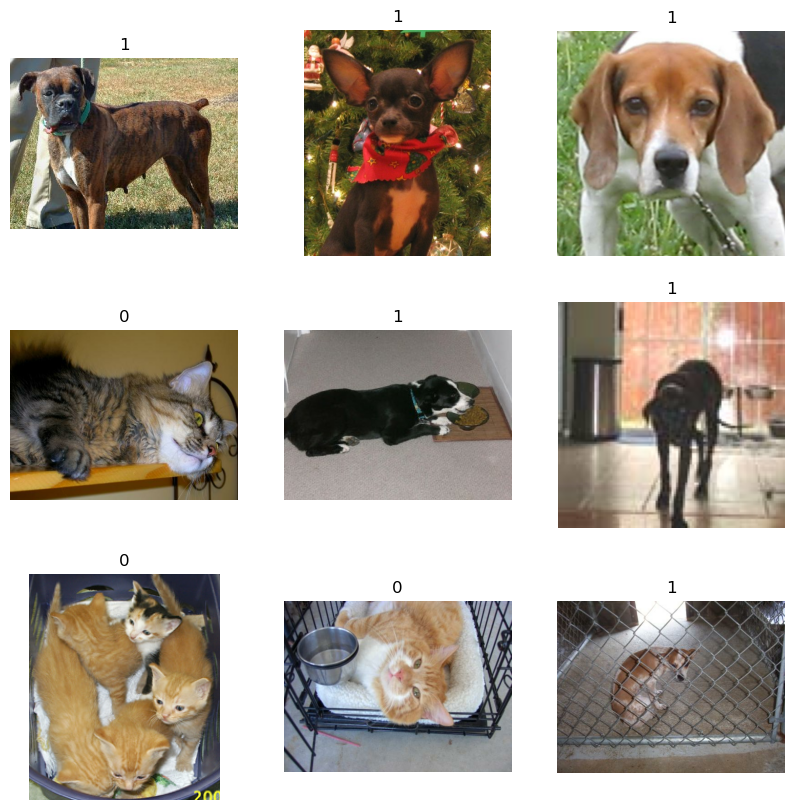

In [3]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [4]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size)/ 255., y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size)/ 255.0, y))

In [5]:
num_train = tf.data.experimental.cardinality(train_ds)
num_test = tf.data.experimental.cardinality(validation_ds)
print(f"Number of training samples: {num_train}")
print(f"Number of validation samples: {num_test}")
print("train_ds",train_ds)

Number of training samples: 9305
Number of validation samples: 2326
train_ds <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


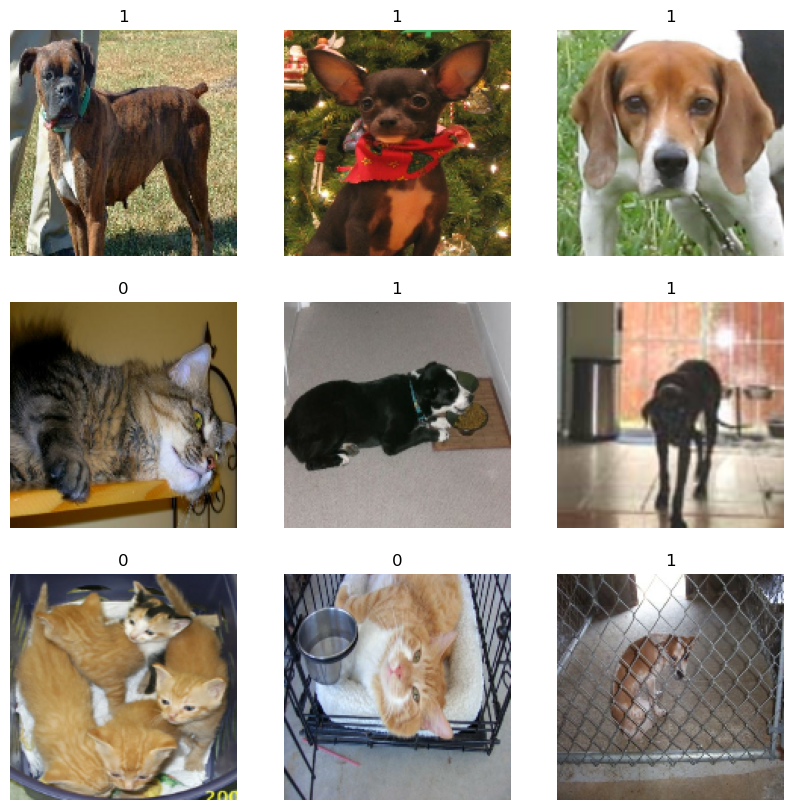

In [6]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [7]:
batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache() \
.batch(batch_size).prefetch(buffer_size=10)

2025-07-01 21:24:23.735345: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


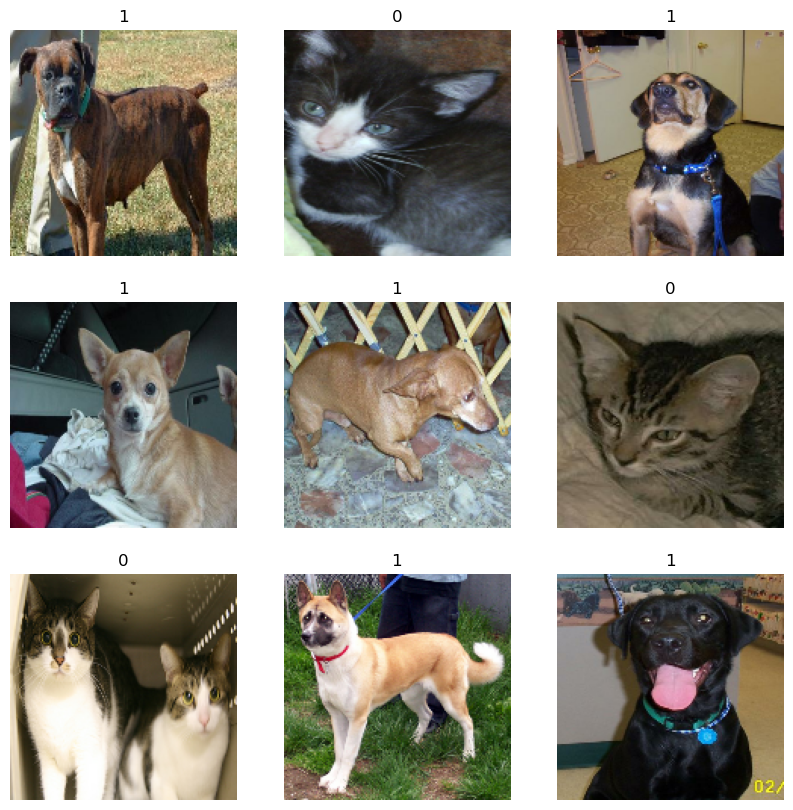

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    # plt.imshow((image * 255).astype(np.uint8))
    plt.title(int(label[i]))
    plt.axis("off")